In [1]:
#Importing all the ncecessary libraries
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Defining the blob centers
centers = [[2, 4], [6, 6], [1, 9]]
n_classes = len(centers)

In [3]:
# Generating the dataset
data, labels = make_blobs(n_samples=150, centers=np.array(centers), random_state=1)

In [4]:
# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [5]:
# Performing KNN analysis (using 3 nearest neighbors)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [6]:
# Making predictions
y_pred = knn.predict(X_test)


In [7]:
# Computing the accuracy score
accuracy = accuracy_score(y_test, y_pred)

In [9]:
# Creating a meshgrid for decision boundary visualization
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predicting class probabilities for each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


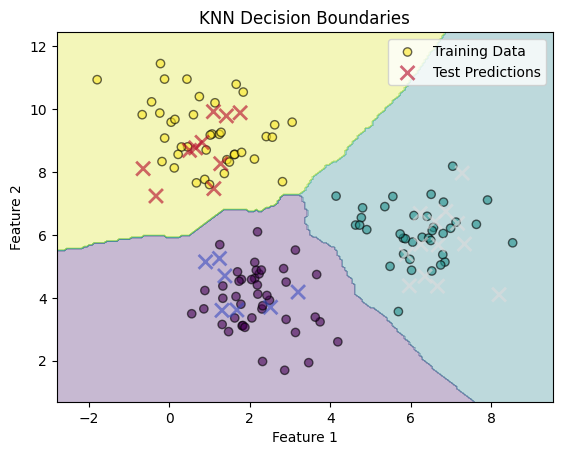

1.0

In [15]:
# Plotting the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k', alpha=0.6, label="Training Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='x',linewidths=2, s=100, alpha=0.6, label="Test Predictions")
plt.title("KNN Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
accuracy

The Accuracy on training and test data is 1.
